In [ ]:
import matplotlib.pyplot as plt
import math as ma
import numpy as np

def heavi(f):
    if f > 0:
        return 1
    else:
        return 0
    
sin_vec = np.vectorize(lambda t: np.sin(np.pi*t/T))
heavi_vec = np.vectorize(heavi)

T = 1 #second
t = np.linspace(0,10,500)
s = sin_vec(t)
h = heavi_vec(s)

plt.plot(t, s, label='$\sin(\pi t / T)$')
plt.plot(t, h, label='$\\theta(\sin(\pi t / T))$')
plt.xlabel('t')
plt.legend(loc=1)
plt.show()

In [ ]:
def force(t):
    f = np.sin(2*np.pi*t/T)
    if f > 0:
        return F0
    else:
        return 0
    
def fourier_old(t, T):
    n = 100
    w = 2*np.pi/T
    #bn = lambda n: 2*F0/(n*np.pi)
    bn = lambda n: (F0/(n*np.pi))*(1 - np.cos(n*np.pi))
    sin_val = lambda t, n: np.sin(n*w*t)
    ans = 0
    for i in range(1,n):
        ans = ans + bn(i)*sin_val(t,i)
    return ans + F0/2

def fourier(t, T):
    n = 20
    w = 2*np.pi/T
    
    #bn = lambda n: 2*F0/(n*np.pi)
    #cn = lambda n: (F0/(n*np.pi))*((-1)**n)*np.sin(np.pi*n)
    #cn = lambda n: (F0/(n*np.pi))*np.exp(-1j*np.pi*n)*np.sin(np.pi*n) if n != 0 else 0
    #cn = lambda n: (F0/1j*2*np.pi*n)*(2 - (-1)**n)
    #e_val = lambda t, n: np.exp(1j*(n*w*t))
    
    fcn = lambda t, n: (F0/np.pi)*(np.sin(n*w*t)/(n))*(1-(-1)**n)
    
    ans = 0
    for i in range(1,n):
        ans = ans + fcn(t,i)
    return ans + F0/2


F_vec = np.vectorize(force)
fourier_vec = np.vectorize(fourier)
fourier_old_vec = np.vectorize(fourier_old)

F0 = 2.
T = 2.
dT = 1.
t = np.linspace(0,10,500)
F = F_vec(t)
F_four = fourier_vec(t, T)
F_four_old = fourier_old_vec(t, T)

plt.plot(t, F, label='Force')
plt.plot(t, F_four, label='Fourier exp force')
#plt.plot(t, F_four_old, label='Fourier old force')
plt.xlabel('t')
plt.legend(loc=1)
plt.show()

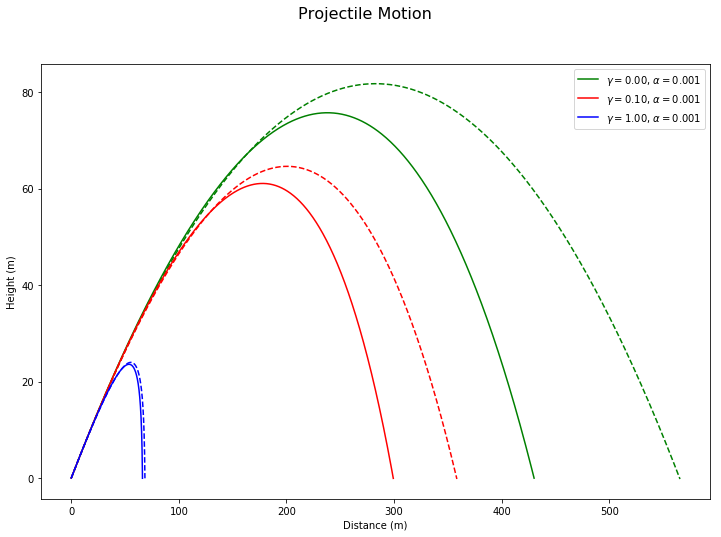

In [ ]:
'''    ax.plot(t, z, label="Finite Difference Z")
    ax.plot(t, x, label="Finite Difference X")
    ax.plot(t, x_motion_vec(t), label="Exact solution X")'''

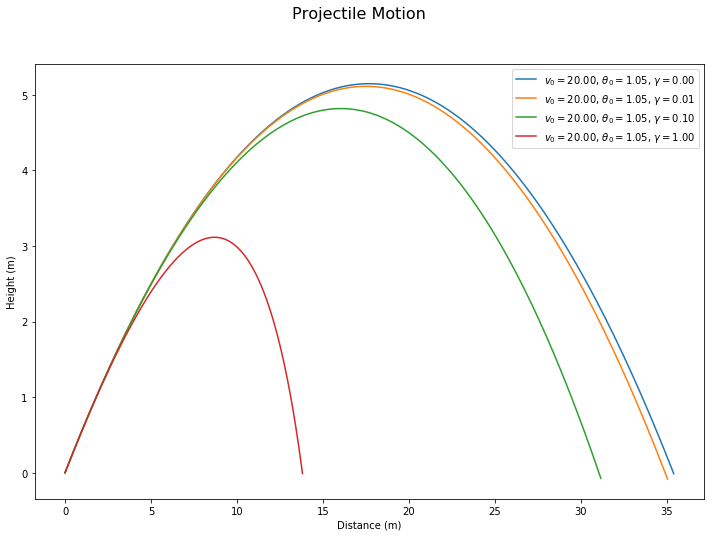

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import sympy as sp
import math as ma

def get_data(v0, the0, gamma):
    g = 9.81
    vx0 = v0*np.cos(the0)
    vz0 = v0*np.sin(the0)
    z0 = x0 = t0 = 0
    dt = 0.01
    tmax = 5 
    
    def step_x(xi, xj): #i = i, j = i-1
        x = dt*(-gamma*(xi - xj)) + 2*xi - xj  
        return x

    def step_z(zi, zj): #i = i, j = i-1
        z = dt*(-gamma*(zi - zj)) - (dt**2)*g + 2*zi - zj
        return z
    
    def x_motion(t): #i = i, j = i-1
        if gamma == 0.0:
            return x0 + vx0*t
        else:
            return x0 + (vx0/gamma)*(1-np.exp(-gamma*t))
        
    def z_motion(t):
        if gamma == 0.0:
            return z0 + vz0*t -0.5*g*t**2
        else:
            return z0 + ((vz0/gamma) + (g/(gamma**2)))*(1-np.exp(-gamma*t)) - (g/gamma)*t
    
    z_motion_vec = np.vectorize(z_motion)
    x_motion_vec = np.vectorize(x_motion)
    
    t = [t0, t0+dt]
    x = [x0, z_motion(dt)]
    
    z = [z0, x_motion(dt)]
    
    while z[-1] > 0:
        x.append(step_x(x[-1], x[-2]))
        z.append(step_z(z[-1], z[-2]))
        t.append(t[-1] + dt) 
    
    return x, z

def plot_projectile(v_list, the_list, gam_list):
    all_x = []
    all_z = []
    
    fig, ax = plt.subplots(figsize=(12,8))
    ax.set_xlabel("Distance (m)")
    ax.set_ylabel("Height (m)")
    fig.suptitle("Projectile Motion", fontsize=16)
    
    for g in gam_list:
        for the in the_list:
            for v in v_list:
                x, z = get_data(v, the, g)
                ax.plot(x, z, label='$v_0 = {0:0.2f}$, $\\theta_0 = {1:0.2f}$, $\\gamma = {2:0.2f}$'.format(v,the,g))
    
    ax.legend()
    
#1a
v0= [20]
the0 = [np.pi/3]
gamma = [0.0, 0.01, 0.1, 1.0]
plot_projectile(v0, the0, gamma)

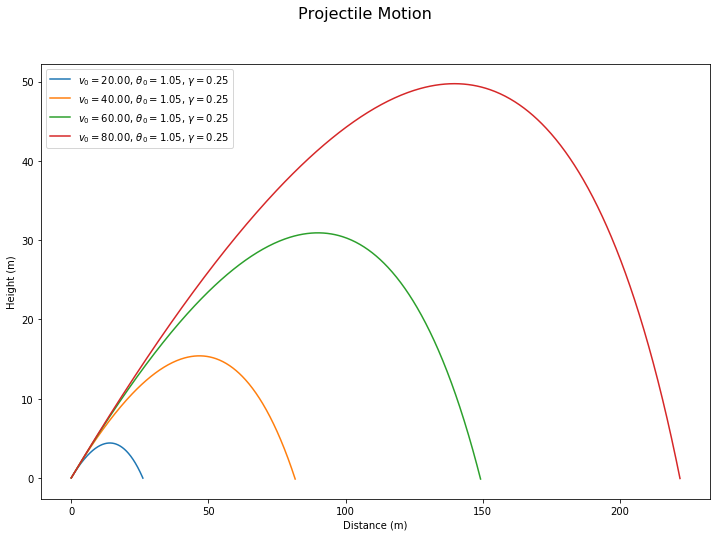

In [17]:
#1b
v0= [20, 40, 60, 80]
the0 = [np.pi/3]
gamma = [0.25]
plot_projectile(v0, the0, gamma)

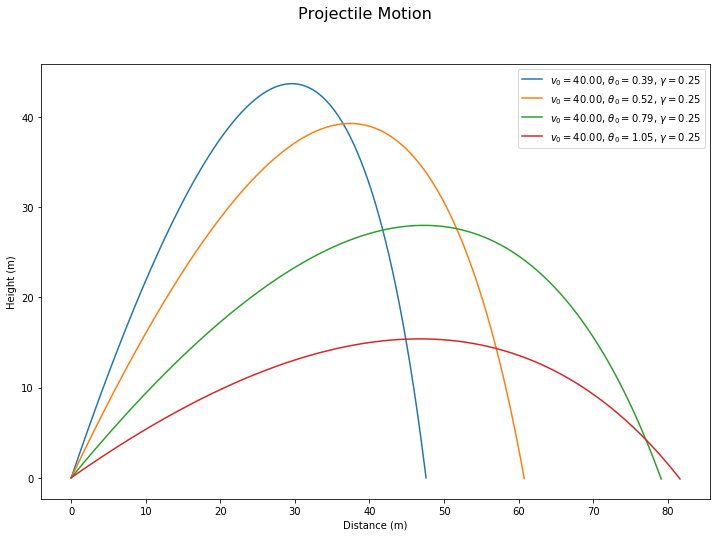

In [18]:
#1c
v0= [40]
the0 = [np.pi/8, np.pi/6, np.pi/4, np.pi/3]
gamma = [0.25]
plot_projectile(v0, the0, gamma)

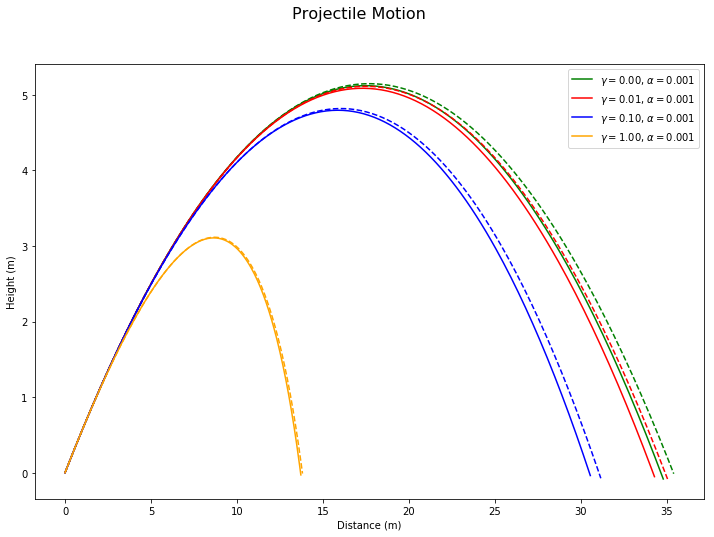

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import sympy as sp
import math as ma

def get_data_d(v0, the0, gamma, alpha):
    g = 9.81
    vx0 = v0*np.cos(the0)
    vz0 = v0*np.sin(the0)
    z0 = x0 = t0 = 0
    dt = 0.01
    tmax = 5 
    
    def step_x(xi, xj): #i = i, j = i-1 
        return dt*(-gamma*(xi - xj)) - (alpha*(xi - xj)**2) + 2*xi - xj 

    def step_z(zi, zj): #i = i, j = i-1
        return dt*(-gamma*(zi - zj)) - (alpha*(zi - zj)**2) - (dt**2)*g + 2*zi - zj
    
    def x_motion(t): #i = i, j = i-1
        if gamma == 0.0: return x0 + vx0*t
        else: return x0 + (vx0/gamma)*(1-np.exp(-gamma*t))
        
    def z_motion(t):
        if gamma == 0.0: return z0 + vz0*t -0.5*g*t**2
        else: return z0 + ((vz0/gamma) + (g/(gamma**2)))*(1-np.exp(-gamma*t)) - (g/gamma)*t
    
    z_motion_vec = np.vectorize(z_motion)
    x_motion_vec = np.vectorize(x_motion)
    
    t = [t0, t0+dt]
    x = [x0, z_motion(dt)]
    z = [z0, x_motion(dt)]
    
    while z[-1] > 0:
        x.append(step_x(x[-1], x[-2]))
        z.append(step_z(z[-1], z[-2]))
        t.append(t[-1] + dt) 
    
    return x, z

def plot_projectile_d(v_list, the_list, gam_list, alpha):
    all_x = []
    all_z = []
    col_list = ['green', 'red', 'blue', 'orange']
    
    fig, ax = plt.subplots(figsize=(12,8))
    ax.set_xlabel("Distance (m)")
    ax.set_ylabel("Height (m)")
    fig.suptitle("Projectile Motion", fontsize=16)
    
    c = 0
    for g in gam_list:
        for the in the_list:
            for v in v_list:
                x, z = get_data_d(v, the, g, 0.0)
                x_d, z_d = get_data_d(v, the, g, alpha)
                ax.plot(x, z, linestyle='dashed', color=col_list[c])
                ax.plot(x_d, z_d, label='$\\gamma = {0:0.2f}$, $\\alpha = {1:0.3f}$'.format(g, alpha), color=col_list[c])
                c = c + 1
    ax.legend()


#2a
alpha = 0.001
v0= [20]
the0 = [np.pi/3]
gamma = [0.0, 0.01, 0.1, 1.0]
plot_projectile_d(v0, the0, gamma, alpha)

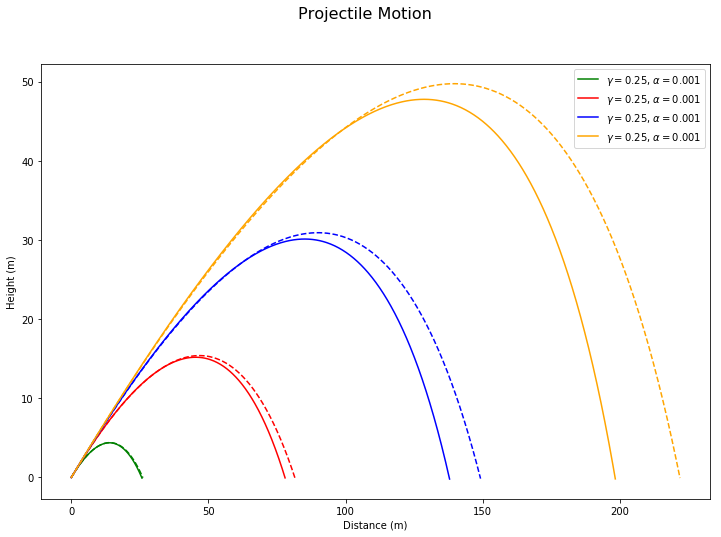

In [33]:
#2b
alpha = 0.001
v0= [20, 40, 60, 80]
the0 = [np.pi/3]
gamma = [0.25]
plot_projectile_d(v0, the0, gamma, alpha)

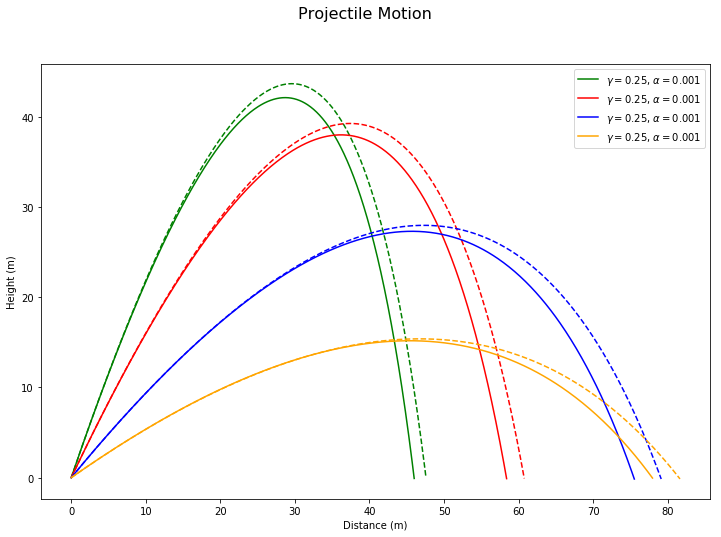

In [34]:
#2c
alpha = 0.001
v0= [40]
the0 = [np.pi/8, np.pi/6, np.pi/4, np.pi/3]
gamma = [0.25]
plot_projectile_d(v0, the0, gamma, alpha)